# DATA PREPARATION

## Step 1 - Loading the Required Libraries and Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, StandardScaler, OneHotEncoder, PolynomialFeatures, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, SGDClassifier, Ridge, Lasso, ElasticNet
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, learning_curve
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.datasets import load_digits

## Step 2 - Reading the Data and performing Basic Data Checks

In [2]:
df = pd.read_csv('data_cleaning_analysis.csv')
print(df.shape)
df.describe()

(21613, 24)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,year_rate
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,...,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2014.322954,6.574423,15.688197,0.677046
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,...,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.467616,3.115308,8.635063,0.467616
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000,1.000000,0.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,2014.000000,4.000000,8.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000,6.000000,16.000000,1.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,9.000000,23.000000,1.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000,31.000000,1.000000


In [3]:
df = df.drop('date', axis=1)

In [4]:
df = df.drop('nb_days', axis=1)

## Step 3 - Creating the Training and Test Datasets  

### Diviser data set en training set et test set

In [5]:
# Séparer la target (i.e. price) des autres valeurs (X)
X = df.drop('price', axis=1)
y = df.price

In [6]:
# Split le dataset en spécifiant le pourcentage de data à garder dans le test dataset
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.20)

## Step 4 - Creating Arrays for the Features and the Response Variable

### Encodage de chaque classe de la variable y en une valeur numérique

#### Pour les variables qui ont un lien hiérarchique

In [7]:
# For the exercise purpose... Because it fits strings better
y = np.array(df.view)

In [8]:
encoder = LabelEncoder()

# Fonctionne avec le y et non le X càd plusieurs variables. Dans ce cas, utiliser OrdinalEncoding(X)
encoder.fit(y)

LabelEncoder()

In [9]:
encoder.classes_

array([0, 1, 2, 3, 4])

In [10]:
encoder.transform(y)
# ou directement encoder.fit_transform(y)

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
# Pour décoder les données
encoder.inverse_transform(np.array([0,0,2,1]))

array([0, 0, 2, 1])

#### Pour les variables catégorielles, i.e. qui n'ont pas de lien hiérarchique

In [12]:
# Créer une matrix compressée
encoder = LabelBinarizer(sparse_output=True)
encoder.fit_transform(y)

<21613x5 sparse matrix of type '<class 'numpy.int64'>'
	with 21613 stored elements in Compressed Sparse Row format>

### Sélection des colonnes à encoder et à standardiser

In [13]:
# Sélection des colonnes numériques
num_col = list(X.select_dtypes(include=[float, int]).columns)

# Sélection des colonnes catégorielles
cat_col = list(X.select_dtypes(include=[object]).columns)

In [14]:
# ou preprocessing
my_col_trans = ColumnTransformer([
    ("one_hot", OneHotEncoder(), cat_col),
    ("scaling", StandardScaler(), num_col)
])

In [15]:
my_pipe=make_pipeline(my_col_trans, LinearRegression(), PolynomialFeatures())

## Step 5 - Build, Predict and Evaluate the Regression Model

## Normalisation

Mettre les valeurs quantitatives sur la même échelle, ce qui facilite l'apprentissage des modèles de Machine Learning

In [16]:
# Transformer chaque variable pour qu'elle soit comprise entre 0 et 1
scaler = MinMaxScaler()
scaler.fit_transform(X)

array([[0.09090909, 0.125     , 0.06716981, ..., 0.81818182, 0.4       ,
        1.        ],
       [0.09090909, 0.28125   , 0.17207547, ..., 1.        , 0.26666667,
        1.        ],
       [0.06060606, 0.125     , 0.03622642, ..., 0.09090909, 0.8       ,
        0.        ],
       ...,
       [0.06060606, 0.09375   , 0.05509434, ..., 0.45454545, 0.73333333,
        1.        ],
       [0.09090909, 0.3125    , 0.09886792, ..., 0.        , 0.5       ,
        0.        ],
       [0.06060606, 0.09375   , 0.05509434, ..., 0.81818182, 0.46666667,
        1.        ]])

In [17]:
# Transformer les variables pour qu'elles aient une moyenne égale à 0 et un écart type égal à 1
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-0.39873715, -1.44746357, -0.97983502, ...,  1.09962055,
        -0.31131901,  0.69065478],
       [-0.39873715,  0.1756067 ,  0.53363434, ...,  1.74162654,
        -0.77455741,  0.69065478],
       [-1.47395936, -1.44746357, -1.42625404, ..., -1.46840343,
         1.07839619, -1.44790136],
       ...,
       [-1.47395936, -1.77207762, -1.15404732, ..., -0.18439144,
         0.84677699,  0.69065478],
       [-0.39873715,  0.50022075, -0.52252773, ..., -1.78940643,
         0.03610979, -1.44790136],
       [-1.47395936, -1.77207762, -1.15404732, ...,  1.09962055,
        -0.07969981,  0.69065478]])

!!! Attention aux outliers. Si présents, utiliser Robuste 

In [18]:
scaler = RobustScaler()
scaler.fit_transform(X)

array([[ 0.        , -1.66666667, -0.65004452, ...,  0.8       ,
        -0.2       ,  0.        ],
       [ 0.        ,  0.        ,  0.58771149, ...,  1.2       ,
        -0.46666667,  0.        ],
       [-1.        , -1.66666667, -1.01513802, ..., -0.8       ,
         0.6       , -1.        ],
       ...,
       [-1.        , -2.        , -0.79252004, ...,  0.        ,
         0.46666667,  0.        ],
       [ 0.        ,  0.33333333, -0.2760463 , ..., -1.        ,
         0.        , -1.        ],
       [-1.        , -2.        , -0.79252004, ...,  0.8       ,
        -0.06666667,  0.        ]])

## Feature Engineering - Création de polynômes

In [19]:

# X_poly = PolynomialFeatures(3).fit_transform(X)

# model = LinearRegression().fit(X_poly, y)
# y_pred =model.predict(X_poly)

# plt.scatter(X, y)
# plt.plot(X, y_pred, c='r', lw=3)


# Normaliser variables après avoir utilisé les polynomialFeatures

## Linear Regression

In [20]:
# Instantiate the algorithm 
lr = LinearRegression()

# Fits the model on the training set
lr.fit(X_train, y_train)

LinearRegression()

#### Make the predictions

In [21]:
#predicts on the training set
pred_train_lr= lr.predict(X_train)

#prints the evaluation metrics - RMSE and R-squared - on the training set
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))

#predicts on the training set
pred_test_lr= lr.predict(X_test)

#prints the evaluation metrics - RMSE and R-squared - on the training set
print(np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print(r2_score(y_test, pred_test_lr))

202745.19060804116
0.7010205915375918
192181.1350173305
0.7019753526438841


The above output shows that the RMSE, one of the two evaluation metrics, is 194361 thousand for train data and 180996 thousand for test data. On the other hand, R-squared value is 72 percent for train data and 71.8 percent for test data, which is a good performance. 

## Ridge Regression

In [22]:
rr = Ridge(alpha=0.01)

rr.fit(X_train, y_train) 

pred_train_rr= rr.predict(X_train)

print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))

print(r2_score(y_train, pred_train_rr))


pred_test_rr= rr.predict(X_test)

print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 

print(r2_score(y_test, pred_test_rr))

202745.1906784061
0.7010205913300636
192181.00475497087
0.7019757566521198


The above output shows that the RMSE and R-squared values for the Ridge Regression model on the training data is 975 thousand and 86.7 percent, respectively. For the test data, the result for these metrics is 1017 thousand and 84 percent, respectively.


## Lasso Regression

In [23]:
model_lasso = Lasso(alpha=0.01)

model_lasso.fit(X_train, y_train) 

pred_train_lasso= model_lasso.predict(X_train)

print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))

print(r2_score(y_train, pred_train_lasso))


pred_test_lasso= model_lasso.predict(X_test)

print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 

print(r2_score(y_test, pred_test_lasso))

202745.19060812087
0.7010205915373567
192181.1299714767
0.7019753682935865


The above output shows that the RMSE and R-squared values for the Lasso Regression model on the training data is 971 thousand and 86.7 percent, respectively.

The results for these metrics on the test data is 1019 thousand and 84 percent, respectively. Lasso Regression can also be used for feature selection because the coeﬃcients of less important features are reduced to zero. 

## ElasticNet Regression

In [24]:
model_enet = ElasticNet(alpha = 0.01)

model_enet.fit(X_train, y_train) 

pred_train_enet= model_enet.predict(X_train)

print(np.sqrt(mean_squared_error(y_train,pred_train_enet)))

print(r2_score(y_train, pred_train_enet))


pred_test_enet= model_enet.predict(X_test)

print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))

print(r2_score(y_test, pred_test_enet))

204763.23774927217
0.695039119745537
193720.0574469525
0.6971832785448987


The above output shows that the RMSE and R-squared value for the ElasticNet Regression model on the training data is 1352 thousand and 74 percent, respectively. The results for these metrics on the test data is 1379 thousand and 71 percent, respectively. 

## Création de la pipeline (ou chaîne de transformation)

Avantages:  
1. simple à utiliser  
2. sécurisé (évite d'avoir des fuites de données ou des données mal transformées)  
3. permet de faire des cross-validation

In [25]:
model = make_pipeline(StandardScaler(), SGDClassifier())

model.fit(X_train, y_train)
model.predict(X_test)

array([550000., 480000., 400000., ..., 290000., 550000., 350000.])

In [26]:
# Trouver les meilleurs paramètres de la pipeline
model = make_pipeline(PolynomialFeatures(), StandardScaler(), SGDClassifier(random_state=0))
params = {
    'polynomialfeatures__degree' : [2, 3, 4],
    'sgdclassifier__penalty' : ['l1', 'l2']
}

grid = GridSearchCV(model, param_grid=params, cv=4)

grid.fit(X_train, y_train)

/home/nusbaumer/miniconda3/envs/nnp/lib/python3.10/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(


KeyboardInterrupt: 

In [27]:
grid.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [28]:
grid.score(X_test, y_test)

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [29]:
my_pipe.fit(X_train, y_train)

TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'LinearRegression()' (type <class 'sklearn.linear_model._base.LinearRegression'>) doesn't

## Courbes d'apprentissage

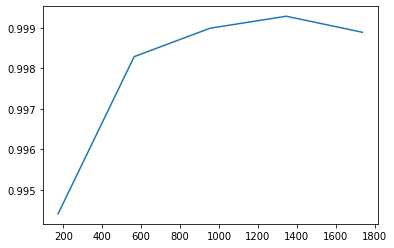

In [30]:
#Avec l'estimator

X, y = load_digits(return_X_y=True)
estimator = SVC(gamma=0.001)

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X, y, cv=30,return_times=True)

plt.plot(train_sizes,np.mean(train_scores,axis=1))

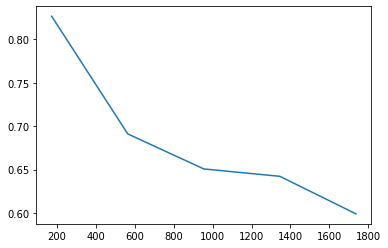

In [31]:
# Avec Ridge Regression (rr)

X, y = load_digits(return_X_y=True)
estimator = SVC(gamma=0.001)

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(rr, X, y, cv=30,return_times=True)

plt.plot(train_sizes,np.mean(train_scores,axis=1))

## Résultat

In [32]:
my_pipe.score(X_test, y_test)

AttributeError: 'PolynomialFeatures' object has no attribute 'score'

 The performance of the models is summarized below:  
 
    Linear Regression Model: Test set RMSE of 1019 thousand and R-square of 83.96 percent.  

    Ridge Regression Model: Test set RMSE of 1017 thousand and R-square of 84.02 percent.  

    Lasso Regression Model: Test set RMSE of 1019 thousand and R-square of 83.96 percent.  
    
    ElasticNet Regression Model: Test set RMSE of 1379 thousand and R-square of 70.62 percent.  

The ElasticNet Regression model is performing the worst. All the other regression models are performing better with a decent R-squared and stable RMSE values. The most ideal result would be an RMSE value of zero and R-squared value of 1, but that's almost impossible in real economic datasets.  

There are other iterations that can be done to improve model performance. We have assigned the value of alpha to be 0.01, but this can be altered by hyper parameter tuning to arrive at the optimal alpha value. Cross-validation can also be tried along with feature selection techniques. However, that is not covered in this guide which was aimed at enabling individuals to understand and implement the various Linear Regression models using the scikit-learn library. 